# Excavator use-case 8: Advanced Cost Functions

In [1]:
%matplotlib widget
import processscheduler as ps

problem = ps.SchedulingProblem("Excavator8:AdvancedCostFunction", horizon=40)

# three tasks
dig_small_hole = ps.VariableDurationTask("DigSmallHole", work_amount=3)
dig_medium_hole = ps.VariableDurationTask("DigMediumHole", work_amount=7)
dig_huge_hole = ps.VariableDurationTask("DigHugeHole", work_amount=15)

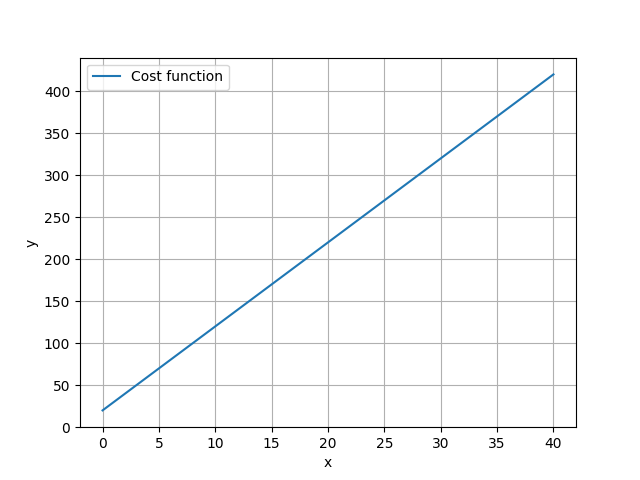

In [2]:
# cost function for the small excavator is linear
def cost_function_small_exc(t):
    """Linear cost function"""
    return 10 * t + 20


small_exc_cost = ps.PolynomialCostFunction(cost_function_small_exc)
small_exc_cost.plot([0, 40])

In [3]:
# cost function for the medium excavator is quadratic, max at the middle
def cost_function_medium_exc(t):
    """Quadratic cost function"""
    return 400 - (t - 20) * (t - 20)


medium_exc_cost = ps.PolynomialCostFunction(cost_function_medium_exc)
medium_exc_cost.plot([0, 40])

In [4]:
small_exc = ps.Worker("SmallExcavator", productivity=4, cost=small_exc_cost)
medium_ex = ps.Worker("MediumExcavator", productivity=6, cost=medium_exc_cost)

dig_small_hole.add_required_resource(
    ps.SelectWorkers([small_exc, medium_ex], 1, kind="min")
)
dig_medium_hole.add_required_resource(
    ps.SelectWorkers([small_exc, medium_ex], 1, kind="min")
)
dig_huge_hole.add_required_resource(
    ps.SelectWorkers([small_exc, medium_ex], 1, kind="min")
)

In [5]:
problem.add_objective_resource_cost([small_exc, medium_ex])

Total Cost (SmallExcavator,MediumExcavator)(<class 'processscheduler.objective.Indicator'>)
1 assertion(s):
Indicator_Total Cost (SmallExcavator,MediumExcavator) ==
0 +
((10*SmallExcavator_maybe_busy_DigSmallHole_start +
  20 +
  10*SmallExcavator_maybe_busy_DigSmallHole_end +
  20)*
 (SmallExcavator_maybe_busy_DigSmallHole_end -
  SmallExcavator_maybe_busy_DigSmallHole_start) +
 (10*SmallExcavator_maybe_busy_DigMediumHole_start +
  20 +
  10*SmallExcavator_maybe_busy_DigMediumHole_end +
  20)*
 (SmallExcavator_maybe_busy_DigMediumHole_end -
  SmallExcavator_maybe_busy_DigMediumHole_start) +
 (10*SmallExcavator_maybe_busy_DigHugeHole_start +
  20 +
  10*SmallExcavator_maybe_busy_DigHugeHole_end +
  20)*
 (SmallExcavator_maybe_busy_DigHugeHole_end -
  SmallExcavator_maybe_busy_DigHugeHole_start) +
 (400 -
  (MediumExcavator_maybe_busy_DigSmallHole_start - 20)*
  (MediumExcavator_maybe_busy_DigSmallHole_start - 20) +
  400 -
  (MediumExcavator_maybe_busy_DigSmallHole_end - 20)*
  (Medium

In [6]:
solver = ps.SchedulingSolver(problem, max_time=30)

Solver type:
	-> Standard SAT/SMT solver
Incremental optimizer:
	Found value: 7343 elapsed time:0.021s
	Checking better value < 7343
	Found value: 1852 elapsed time:0.095s
	Checking better value < 1852
	Found value: 1597 elapsed time:8.748s
	Checking better value < 1597
	Found value: 1379 elapsed time:8.755s
	Checking better value < 1379
	No solution can be found for problem Excavator8:AdvancedCostFunction.
	Reason: (incomplete (theory arithmetic))
	total number of iterations: 5
	value: 1379
	Excavator8:AdvancedCostFunction satisfiability checked in 8.75s


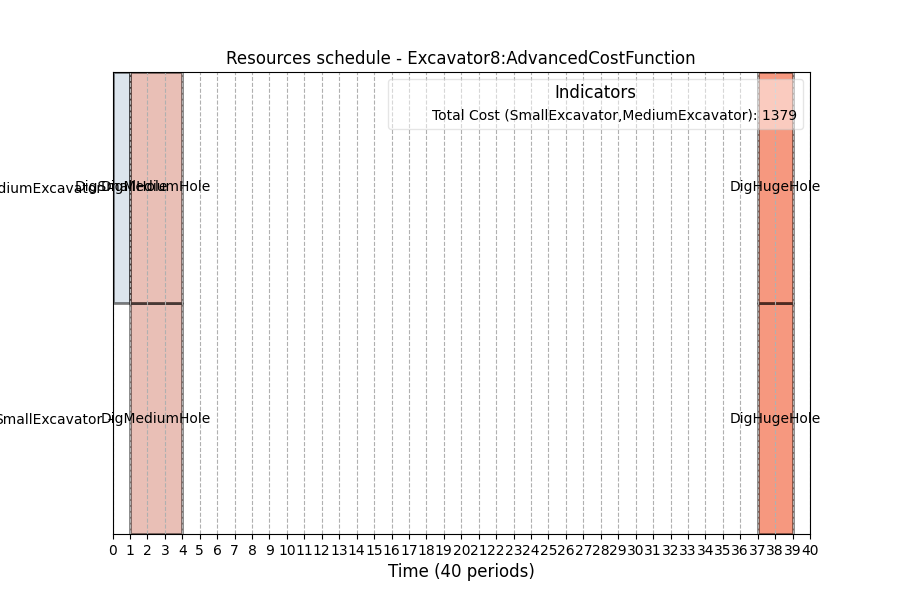

In [7]:
solution = solver.solve()
solution.render_gantt_matplotlib()